<a href="https://colab.research.google.com/github/caplove/DX_team_4_repo/blob/main/Team_4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 가져오기**

---



In [2]:
!git clone https://github.com/caplove/DX_team_4_repo.git

Cloning into 'DX_team_4_repo'...
remote: Enumerating objects: 471, done.
remote: Counting objects: 100% (471/471), done.
remote: Compressing objects: 100% (451/451), done.
remote: Total 471 (delta 248), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (471/471), 17.10 MiB | 5.53 MiB/s, done.
Resolving deltas: 100% (248/248), done.


In [3]:
#과제 설명
from IPython.display import Image
#Image('./image/image_01.png',width=800,height=600)

In [4]:
import sys
sys.path.append('/content/DX_team_4_repo')

# 모듈과 함수 불러오기


In [5]:
"""모듈 / 함수 불러오기 """
from augment_import2 import augment2
from extractor_import import extractor
#from models_import import my_models
from models_import2 import my_models

from data_import import import_data_from_folder
import pandas as pd

## 데이터 구조

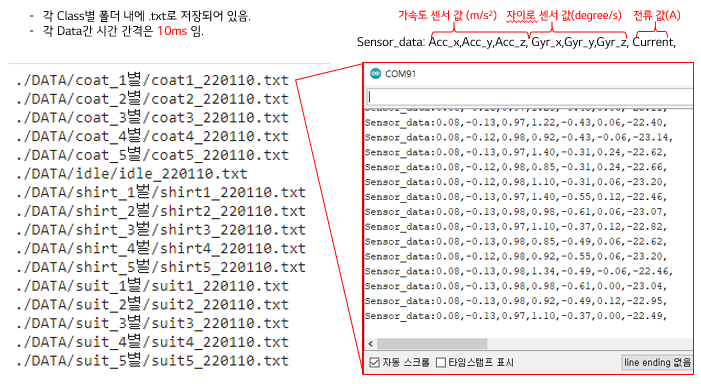

In [6]:
"""시계열 데이터 import"""
# 훈련 / 검증 데이터 : Data
# 테스트 데이터 : Data_test

FOLDER_NAME = "/DX_team_4_repo/Data"
x,y = import_data_from_folder(FOLDER_NAME)
print(x.shape,y.shape)

TEST_FOLDER_NAME = "/DX_team_4_repo/Data_test"
test_x,test_y = import_data_from_folder(TEST_FOLDER_NAME)
print(test_x.shape,test_y.shape)

""" 비어있는 데이터프레임 만들기"""
features_all = pd.DataFrame()
# jittering / MagWarp / Scaling / Combination
x_in_jittering = pd.DataFrame()
x_in_MagWarp = pd.DataFrame()
x_in_Scaling = pd.DataFrame()
x_in_Combination = pd.DataFrame()

.//DX_team_4_repo/Data//shirt_2.txt
.//DX_team_4_repo/Data//suit_4.txt
.//DX_team_4_repo/Data//suit_2.txt
.//DX_team_4_repo/Data//coat_1.txt
.//DX_team_4_repo/Data//coat_4.txt
.//DX_team_4_repo/Data//shirt_3.txt
.//DX_team_4_repo/Data//suit_5.txt
.//DX_team_4_repo/Data//suit_1.txt
.//DX_team_4_repo/Data//idle.txt
.//DX_team_4_repo/Data//coat_2.txt
.//DX_team_4_repo/Data//coat_5.txt
.//DX_team_4_repo/Data//coat_3.txt
.//DX_team_4_repo/Data//suit_3.txt
.//DX_team_4_repo/Data//shirt_1.txt
.//DX_team_4_repo/Data//shirt_4.txt
.//DX_team_4_repo/Data//shirt_5.txt
(274582, 7) (274582,)
.//DX_team_4_repo/Data_test/coat_4/coat_4.txt
.//DX_team_4_repo/Data_test/suit_2/suit_2.txt
.//DX_team_4_repo/Data_test/suit_1/suit_1.txt
.//DX_team_4_repo/Data_test/suit_5/suit_5.txt
.//DX_team_4_repo/Data_test/coat_1/coat_1.txt
.//DX_team_4_repo/Data_test/coat_3/coat_3.txt
.//DX_team_4_repo/Data_test/shirt_4/shirt_4.txt
.//DX_team_4_repo/Data_test/coat_5/coat_5.txt
.//DX_team_4_repo/Data_test/idle/idle.txt
.//

# 파라미터 설정

>> - 시계열 데이터 augmentation 종류

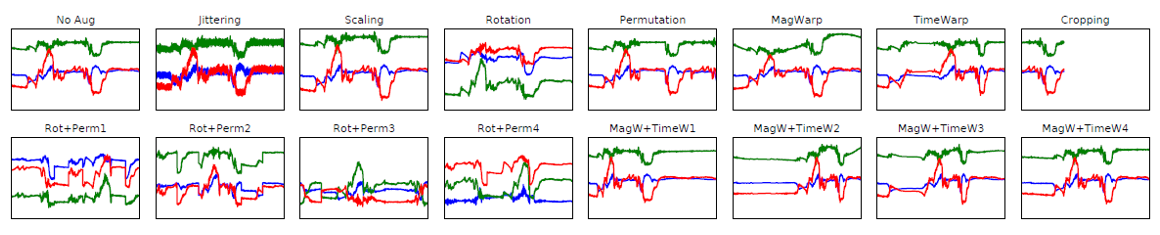



>> - external_test_data_use flag :
 * 0 : train과 test가 동일 set 에서 split 하여사용
 * 1 : 별도의 폴더(Data_test)에서 불러와서 사용 

>> - log_en : 0 (off), 1(on)


In [7]:
"""Augmentation param 설정"""
# jitter_para_list = [0.01, 0.05, 0.1]  # sigma
# MW_para_list =     [0.01, 0.05, 0.1]  # sigma
# Scale_para_list =  [0.01, 0.05, 0.1]

jitter_para_list = [0.01]  # sigma
MW_para_list =     [0.01]  # sigma
Scale_para_list =  [0.01]

"""flag"""
# 별도의 test data(Data_test폴더) 사용여부 결정  
external_test_data_use = 1  # 0 : Data 폴더에서 8:1:1로 split사용,   1:Data_test폴더의 데이터 사용 

# 그래프/결과값 보이기
log_en = 0   # 0 : 결과만 보임,  1 : 중간 과정 보임.

# 빈 Accuracy.xls 만들기
# df = pd.DataFrame(columns=['jit','MW','Scale','DNN','MLP','DTree','KNN','AdaBoost','RandomForest'])

# Augment / 모델별 Accuracy
> - Augment Params : jitter, MagWarp, Scale 의 sigma값에 따라 모델의 정확도를 측정함. 
> - 모델 : DNN, MLP, DTree, KNN, AdaBoost, RandomForest

> - 함수설명

>>  - augment2(x,y,i,j,k,log_en)   
    - x,y : x,y DataFrame 
    - i,j,k : jitter,MW,Scale의 sigma값
    - log_en : 설명 데이터 출력 유/무 flag
    - return :x_in_jittering, x_in_MagWarp, x_in_Scaling, x_in_Combination


>>  - extractor(x,y,dataset_list,log_en
    - x,y : x,y DataFrame 
    - dataset_list : 증강 데이터 list  ex)  [x, x_증강1, x_증강2, ...]
    - return :features_all


>>  - my_models(features_all,log_en,external_test_data_use,features_test)
    - features_all : feature 값 DataFrame
    - external_test_data_use : Data_test 폴더의 데이터를 테스트데이터로 사용여부 flag
    - features_test : feature 값 DataFrame ( external_test_data_use = 1이면 사용됨) 
    - return : Acc_DNN,Acc_MLP,Acc_TREE,Acc_KNN,Acc_Ensemble, Acc_RForest

In [8]:
# i,j,k는 각각 jitter, MagWarp, Scale의 sigma 값


for i in jitter_para_list:
    for j in MW_para_list:
        for k in Scale_para_list:
            
            print(f"jitter_sigma:{i},   MW_sigma:{j},   Scale_sigma:{k}")
            # augmentation 방법별로 원본 x와 동일 size의 데이터 생성
            # x_in_jittering, x_in_MagWarp, x_in_Scaling, x_in_Combination = augment2(x,y,i,j,k,log_en)
            #print(x.shape, x_in_jittering.shape, x_in_MagWarp.shape, x_in_Scaling.shape, x_in_Combination.shape, y.shape)
            print("status: 데이터 증강 완료")

            # 증강 데이터 선정
            dataset_list = [x]                                                               # default 데이터
            # dataset_list = [x,x_in_jittering, x_in_MagWarp,x_in_Scaling, x_in_Combination]   # 증강    데이터
            
            # 원본 포함 증강된 데이터의 특징 추출하고 merge            
            features_train = extractor(x,y,dataset_list,log_en)

            
            # 테스트 데이터 선정
            dataset_list = [test_x]
            #           테스트 데이터의 특징 추출하고 merge 
            features_test = extractor(test_x,test_y,dataset_list,log_en)
            print("status: Features 추출 완료")
            
 

jitter_sigma:0.01,   MW_sigma:0.01,   Scale_sigma:0.01
status: 데이터 증강 완료
status: Features 추출 완료


In [9]:
print(features_train.shape,features_test.shape)

(662, 53) (192, 53)


In [10]:
features_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,class
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-340.208940,9.999247,9.996988,9.993224,9.987955,9.981181,9.972905,9.963126,9.951847,9.939070,9.924795,9.909026,9.891765,201.391341,0.925284,-4.041210,7.387525,1.751451,0.090655,0.394997,1.490920,2.452048,-4.733238,3.687767,0.847616,3.709894,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-340.208940,9.999247,9.996988,9.993224,9.987955,9.981181,9.972905,9.963126,9.951847,9.939070,9.924795,9.909026,9.891765,273.739337,2.944957,0.142026,-0.573331,1.535497,-3.454344,-7.073645,-2.805138,-1.876212,-2.081281,-6.421273,1.218584,0.310433,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-340.208940,9.999247,9.996988,9.993224,9.987955,9.981181,9.972905,9.963126,9.951847,9.939070,9.924795,9.909026,9.891765,203.218297,1.315889,5.813116,-5.363791,-6.252804,-2.776524,-2.444918,0.976442,3.285535,-0.567978,-2.320336,-0.079556,5.451989,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-162.113785,8.161720,8.000247,8.156804,8.002595,8.146974,7.989094,8.132237,7.968228,8.112601,7.949393,8.088079,7.923874,203.913445,1.792793,-1.025874,-3.227174,-7.178538,3.415736,-5.713125,-3.127864,1.936888,4.775039,-2.434643,3.841988,2.972255,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-340.208940,9.999247,9.996988,9.993224,9.987955,9.981181,9.972905,9.963126,9.951847,9.939070,9.924795,9.909026,9.891765,203.336192,-5.578025,-3.158794,-1.916322,-3.194026,-7.659798,-5.715364,0.557323,6.521582,6.264885,-7.649926,3.726388,4.487350,idle


In [11]:
train_data = features_train[features_train['class'] =='shirt_1']
test_data = features_test[features_test['class']=='shirt_1']

In [12]:

# features_train = features_train['class'] == 'shirt_1'
X_train = train_data.iloc[:, 0:52].values   # array 화

# features_test = features_test['class'] == 'shirt_1'
X_test = test_data.iloc[:, 0:52].values   # array 화

print(X_train.shape,X_test.shape)

(26, 52) (17, 52)


In [13]:
wsz=5   # window size   
ntree=200  # 앙상블 개수

In [14]:
''' 기본 모듈 및 분류 모듈'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [15]:
RF=RandomForestClassifier(n_estimators = ntree, criterion = 'entropy', random_state=0 ,oob_score=True)

In [16]:
temp_y=np.array(["N","A"])
label_y=np.repeat(temp_y,[wsz,wsz],axis=0)
label_y

array(['N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A'], dtype='<U1')

In [17]:
prob_CL=[]
vi_tr=[]

# 정상 데이터만을 가지고 렌덤으로 셔플하여
for i in range(100):   # 100개 반복해서 만듬
    idx_ref = rd.sample(range(X_train.shape[0]),wsz)    # X_train.shape = (26,52) --> 26개의 row 중에 10개를 랜덤발췌--> ref 만듬
    idx_con = rd.sample(range(X_train.shape[0]),wsz)    # X_train.shape = (26,52) --> 26개의 row 중에 10개를 랜덤발췌--> con 만듬
    # idx는 예시로 [1,26,3,7, ..., 11] 값
    
    tempRef = train_data.iloc[idx_ref,0:52]
    tempCon = train_data.iloc[idx_con,0:52]
    tempData = pd.concat([tempRef,tempCon])              # tempData.shape = (20,10)   
    RF.fit(tempData,label_y)    # label_y = array(['N', 'N', 'N', 'N', ...,'A','A',
    prob_CL.append(RF.oob_score_)
    vi_tr.append(RF.feature_importances_)

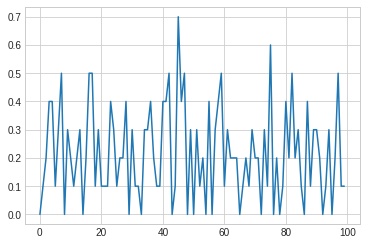

In [18]:
# 동질의 sample 데이터 (shirt1)에서의 분류 정확도
# 동질이면 분류가 안되어, accuracy가 낮아야 정상임.
# 높다면 wsz를 높여서 smoothing
plt.plot(prob_CL)   # 분류기 분류 정확도

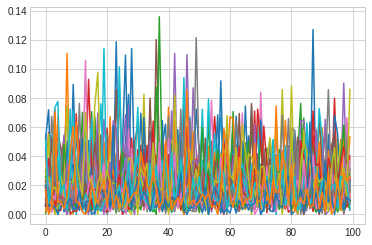

In [19]:
vi_tr   # 주요 인자 확률
plt.plot(vi_tr)

In [20]:
CL=np.quantile(prob_CL,0.95)
CL

0.5

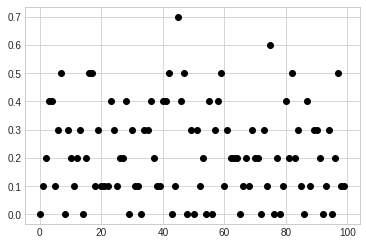

In [21]:
plt.plot(prob_CL,'ko')

# Test step

>> ref : train_data 중 무작위 wsz 만큼 추출

>> test: test_data 순차적 wsz 만큼 추출 

In [22]:
prob=[]  # 확률
vi=[]    # 중요도
for i in range(test_data.shape[0]-wsz):   # test 할 자료 갯수 - wsz 
    # 훈련 set (shirt1_26개)에서 무작위로 10개 뽑아서, ref를 만든다.
    idx_ref = rd.sample(range(X_train.shape[0]),wsz)   # (26,52)
    #idx_con = rd.sample(range(X_train.shape[0]),wsz)
    tempRef = train_data.iloc[idx_ref,0:52]

    # Con은 test 할 데이터에서 순차적으로 10개 뽑아서 만든다.
    tempCon = test_data.iloc[(i):(i+wsz),0:52]
    tempData = pd.concat([tempRef,tempCon])
    RF.fit(tempData,label_y)
    prob.append(RF.oob_score_)
    vi.append(RF.feature_importances_)

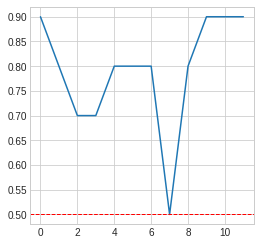

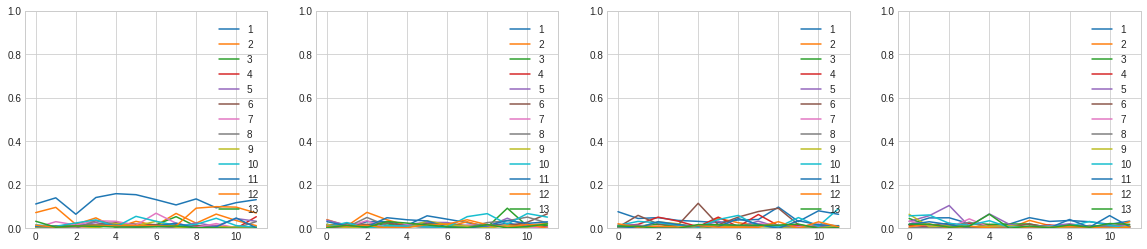

In [76]:
# 관리도 결과 plot
plt.figure(figsize=(4,4))
plt.plot(prob)
plt.axhline(CL,color ='r',linewidth=1,linestyle='--')

# 변수별 feature importance 확인
vi_arr = np.array(vi)
plt.figure(figsize=(20,4))

for ii in range(4):
  plt.subplot(1,4,ii+1)
  plt.plot(vi_arr[:,ii*13:(ii+1)*13])
  plt.ylim([0,1])
  plt.legend([1,2,3,4,5,6,7,8,9,10,11,12,13],loc='right')

## 데이터 저장
>> - accuracy.csv에 param/model별 결과 저장

In [ ]:
""" 실험데이터 저장"""
df.to_csv("accuracy.csv", mode='a', header=True)

In [ ]:
"""시각화"""
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import seaborn as sns
#sns.set_style("white")
import itertools
# %matplotlib inline
import pandas as pd

""" 실험데이터 불러오기"""
# df = pd.read_csv("./accuracy-org.csv",index_col=0)
df = pd.read_csv("./accuracy.csv",index_col=0)

df['avg_accuracy']=df.iloc[:,3:-1].mean(axis=1)   

# no augment 성능
# DNN: 0.940, MLP:0.902, DTree:0.759, KNN:0.940, AdaBoost: 0.714, RandomForest: 0.872

## 분석

> -Training / Test set 이 동일 모집단에서 split 하여, 훈련 / 검증한 경우

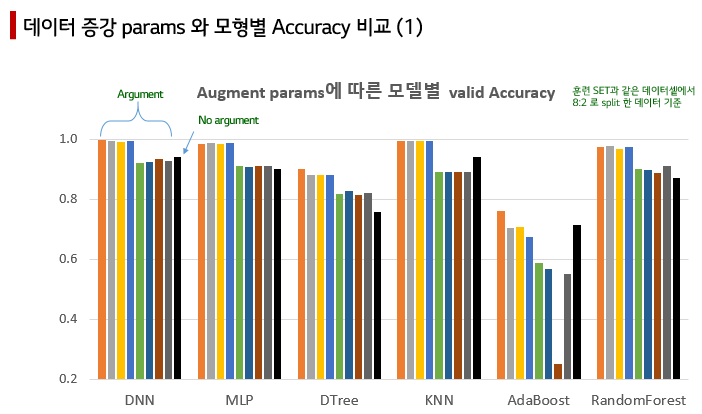

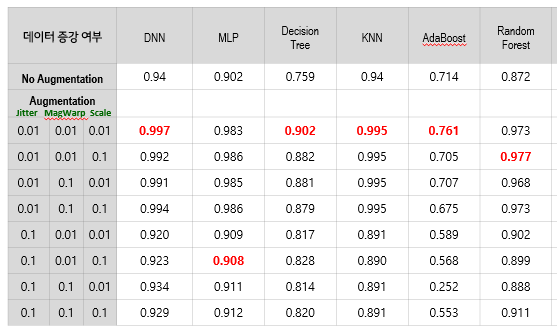

> - Test set을 다른 싯점에 구해서 검증한 경우

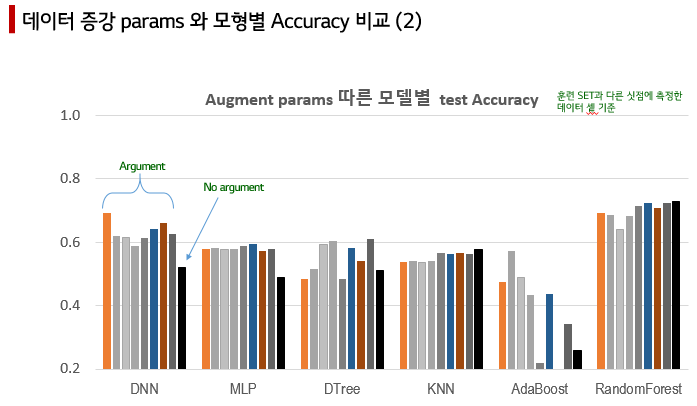

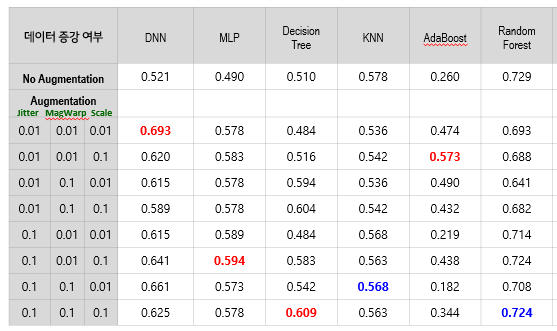

In [ ]:
"""분석"""

#graph_list = [0.01, 0.05, 0.1]   # df.jit에 따른 Accuracy 비교
graph_list = [0.01, 0.1]   # df.jit에 따른 Accuracy 비교
plt.figure(figsize=(10,5))
plt.title('models\' average accuracy')

for graph_list_item in graph_list:
    
    idx = df.jit == graph_list_item
    plt.plot(df.avg_accuracy[idx],label=f'augment(jitter_sigma={graph_list_item},MW,Scale)')
    
#plt.axhline(y=0.854, color='r',linestyle = 'dashed',label='no augment')
plt.axhline(y=0.514, color='r',linestyle = 'dashed',label='no augment')
plt.ylim([0.3, 1])
plt.legend(loc='lower left')

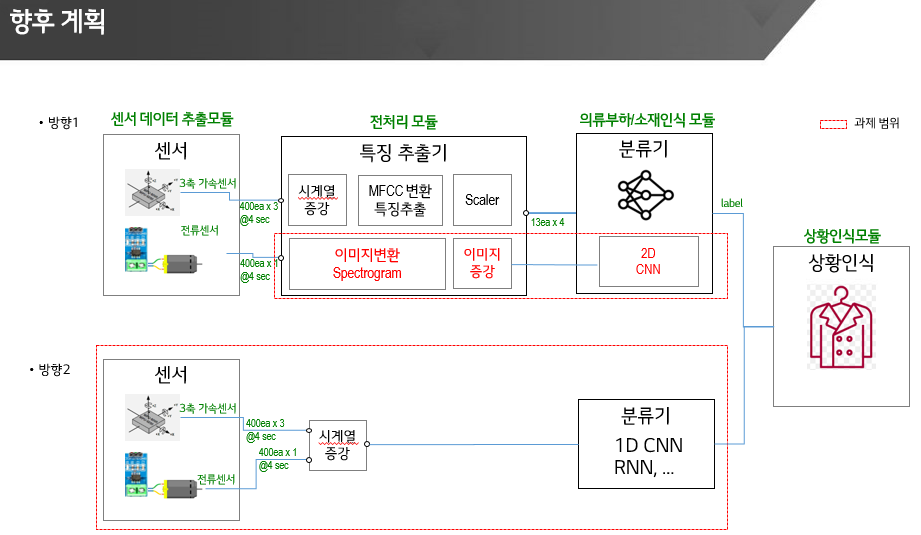